# Background

dfjanskldjfad asdfahjsdc

# Import Libraries and Data

In [36]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [31]:
data_cpi_and_ex = pd.read_csv('../data/cpi_and_exchange_rate.csv', header=0).dropna()
data_gdp_and_ex = pd.read_csv('../data/gdp_and_exchange_rate.csv', header=0).dropna()

In [6]:
df_merge = pd.merge(data_cpi_and_ex, data_gdp_and_ex, on='half_year')
df_merge = df_merge.drop(columns=['ex_rate', 'exc_growth'])

In [13]:
df_merge.head()

,half_year,cpi,inflation,exchange_rate,GDP
0,1993-H1,67.631667,1.505212,1.630887,10.65
1,1993-H2,68.649667,2.068473,1.597829,12.20
2,1994-H1,70.069667,2.057952,1.567529,11.90
3,1994-H2,71.511667,0.308108,1.485443,10.40
4,1995-H1,71.732000,0.424729,1.418135,6.20


# Preliminary Analysis

In [7]:
df_merge.shape

(53, 5)

In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   half_year      53 non-null     object 
 1   cpi            53 non-null     float64
 2   inflation      53 non-null     float64
 3   exchange_rate  53 non-null     float64
 4   GDP            53 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [11]:
df_merge.describe()

,cpi,inflation,exchange_rate,GDP
count,53.000000,53.000000,53.000000,53.000000
mean,83.230390,0.746460,1.499215,5.729245
std,11.166518,1.126365,0.175672,4.385547
min,67.631667,-1.461419,1.234461,-4.950000
25%,74.593667,0.098185,1.371180,3.400000
50%,77.141333,0.479499,1.441219,5.700000
75%,97.373333,1.290241,1.680791,8.800000
max,100.033000,3.885432,1.817832,17.300000


insert observations

# Preprocessing

In [14]:
X = df_merge[['cpi', 'inflation', 'GDP']]
y = df_merge['exchange_rate']

In [17]:
X.shape

(53, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(35, 3)

In [19]:
X_test.shape

(18, 3)

# Modelling

## Linear Regression

In [21]:
# train vanilla linear regression
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [23]:
### Predicted exchange rate ###
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

0.017329530758376732

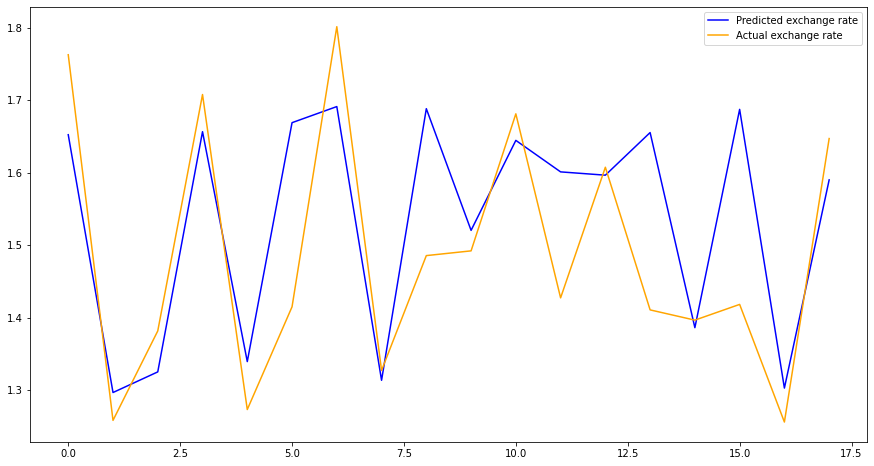

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_pred, color='blue', label='Predicted exchange rate')
ax.plot(y_test.values, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

## Decision Tree

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

0.018748709783104462

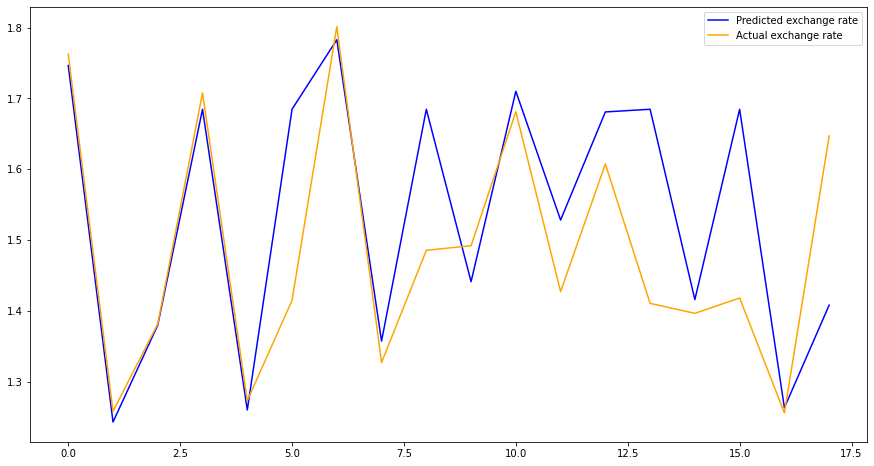

In [35]:
### visualize model graphically ###

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_pred, color='blue', label='Predicted exchange rate')
ax.plot(y_test.values, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

# Final Thoughts

insert observations and conclusion.
- Why model A is better than model C?
- What are the advantages and disadvantages of your best model?
- Is your rmse score good?
- How can this model be used?